In [ ]:
import geopandas as gpd

geojson_file = "/content/Hospitals_4326.geojson"
gdf = gpd.read_file(geojson_file)

gdf.head()

,Address_ID,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,PLACE_NAME,LONGITUDE,LATITUDE,geometry
0,54248,82 Buttonwood Ave,M6M 2J5,YORK,West Park Hospital,-79.5090,43.6893,POINT (-79.509 43.6893)
1,487172,3560 Bathurst St,M6A 2E1,NORTH YORK,Baycrest Centre,-79.4341,43.7301,POINT (-79.4341 43.7301)
2,504810,285 Cummer Ave,M2M 2G1,NORTH YORK,St. John's Hospital,-79.4047,43.7896,POINT (-79.4047 43.7896)
3,515959,685 Finch Ave W,M2R 1P2,NORTH YORK,St. Bernard's Hospital,-79.4569,43.7705,POINT (-79.4569 43.7705)
4,536800,4001 Leslie St,M2K 1E1,NORTH YORK,North York General Hospital,-79.3625,43.7696,POINT (-79.3625 43.7696)


In [ ]:
cols_kept = gdf.columns.to_list()
cols_kept[0:7]

['Address_ID',
 'ADDRESS_FULL',
 'POSTAL_CODE',
 'MUNICIPALITY',
 'PLACE_NAME',
 'LONGITUDE',
 'LATITUDE']

In [ ]:
col_kept = ['ADDRESS_POINT_ID',
 'ADDRESS_FULL',
 'POSTAL_CODE',
 'MUNICIPALITY',
 'PLACE_NAME',
 'LONGITUDE',
 'LATITUDE']

In [ ]:
import pandas as pd

In [ ]:
# Exportable Links to google sheets
exp_schools = '/content/Schools.xlsx'
exp_libs = '/content/Libraries.xlsx'
exp_cc = "/content/Cooling_Center.xlsx"

In [ ]:
df = pd.read_excel(exp_schools, header=0)
school = df[col_kept]

In [ ]:
df = pd.read_excel(exp_libs, header=0)
libs = df[col_kept]

In [ ]:
from shapely.geometry import Point

def create_point(df):
  df = df.rename(columns={'ADDRESS_POINT_ID': 'Address_ID'})
  df['geometry'] = df.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)

  # Convert to GeoDataFrame
  gdf = gpd.GeoDataFrame(df, geometry='geometry')

  # Set a coordinate reference system (CRS)
  # Replace EPSG:4326 with the appropriate CRS if needed
  gdf.set_crs(epsg=4326, inplace=True)

  return gdf

In [ ]:
school_4326 = create_point(school)
school_4326.to_file("Schools_4326.geojson", driver="GeoJSON")

In [ ]:
libs_4326 = create_point(libs)
libs_4326.to_file("Libraries_4326.geojson", driver="GeoJSON")

In [ ]:
cc = pd.read_excel(exp_cc, header=0)
cc_4326 = create_point(cc)
cc_4326.to_file("Cooling_Center_4326.geojson", driver="GeoJSON")

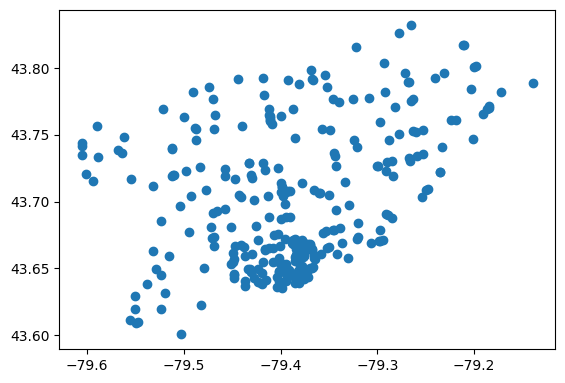

In [5]:
import matplotlib.pyplot as plt
import geopandas as gpd

gdf = gpd.read_file("Supermarkets_4326.geojson")
# Change id to Address_ID
gdf = gdf.rename(columns={'id': 'Address_ID'})
gdf.to_file("Supermarkets_4326.geojson", driver="GeoJSON")
# Plot the GeoDataFrame
gdf.plot()
plt.show()